# Insitutional DeFi: Arbitrage opportunities of Permissioned and open Uniswap AMMs 

## Research Topic/Question
- a. How would the economic paramaters (price, TVL, interest) develop in a replicated DeFi permissioned application vs. permissionless DeFI applications?
    - i. With the example of an AMM protocol
    - ii. How to define the role arbitrageur, which agent can arbitrage accross the white/grey pools
    - iii. Which arbitrage options are possible (same asset, cross asset, cross application)
- b. Can we derive discussions about the future size of both pools?
    - i. Under what assumptions will the TVL be larger/smaller in permissioned vs permissionless
    - ii. Under what assumptions will the fees be larger/smaller

## Model input details
 
The idea is to model institutional investors, who face stringent regulatory requirements, with access to DeFi protocols using a simple example based on the Uniswap AMM model. The suggested approach will offer private pools of funds where only participants who pass KYC procedures can enter trades. Such an instrument will be considered a complex financial instrument under existing regulation, so not suitable for broader basic retail distribution, but it would be relevant to investigate how to bridge DeFi and TradFi and using cadCAD (more specifically radCAD) as the simulation tool for an institutional offering of AMM.
In terms of any differences between the pools, the working hypothesis is, that participants with access to both the private and public pools could arbitrage the difference.

The methodology for the tests is to create two universes - one for a permissioned AMM and one for a normal/open AMM both based on the Uniswap AMM model - to subsequently be able to represent sequences of arbitrage actions.

Baseline would likely be a micro economic black box model with some simple assumptions around the ecosystem, using a clone of 2 permissionless AMMs and time series to simulate to demonstrate arbitrage conditions, using simple arbitrage strategies, nailing down the intent of arbitrage and informed arbitrage actors vs LPs, leveraging existing academic work on the same. The state of the system should be described by a state map with a set of state variables with the dynamics of the system described by policy functions and state update functions, which are evaluated with cadCAD according to the definitions set in the partial state update blocks.

A simulation configuration is then comprised of a system model and a set of simulation properties, that need to be developed including “what if” scenarios, for example:

- Assuming every price difference will lead to arbitrage, every trading point in permissioned (“white”) pool is then perfectly matched by arbitrageurs with access also to permissionless (“grey”) pool -> both pools are equal and price discovery is the same. So the task is to define assumptions, test assumptions incl fees, slippage, time, rebalancing, Oracle/CEX/DEX influence and other realistic constraints affecting arbitrage as it relates to grey/white pool.
- Simulate results if only 1, 10, 25, 50, 75, 90 pct of trading points in one pool are matched by the other -> ? Investigate/hypothesize under what conditions arbitrageurs will accept KYC “trade-off”, ie is there is demand/supply problem we can solve.
- How long will it take for arbitrageurs to close gaps between the 2 pools, what if the gap is bigger or fee is lower etc. Who will take liquidity from the KYC’d pool, is there an institutional demand what, and what will the supply demand elasticity look like. The grey pool will have more participants and deeper liquidity, what will this look like and how will the white pool evolve via arbitrage.
- Review existing litterature for more advanced arbitrage strategies and test interactions per 1-3) above incl CEX-DEX lessons and possibly the role of order routing services
- Validate findings via interviews with key players
- To be determined if and how to substitute out Uniswap for Balancer for Hydra during project

## Model structure

This approach necessitates the definition and specification of two models:
   - 1 Uniswap model with 3 instances that each are responsible for a particular trading pair in a permissioned mode
        - one instance is used for liquidity provision in asset $R_i$: this is modeled as a Uniswap of $R_i$ and $Q$
        - one instance is used for liquidity provision in asset $R_j$: this is modeled as a Uniswap of $R_j$ and $Q$
        - one instance is used for swaps between assets $R_i$ and $R_j$: this is modeled as a Uniswap of $R_i$ and $R_j$
   - 1 Uniswap model with 1 instance that is responsible for a particular trading pair in a permissionless mode
        - one instance is used for arbitrage opportunities and swaps between assets $R_i$ and $R_j$: this is modeled as a Uniswap of $R_i$ and $R_j$

## Test agents

The first model (KYC - White pool) specifies a number of eight agents that each have their local balances, can interact with the system and are modeled to be responsible for **one action only**. This allows to track for each testcase how the balances will develop and to show independently which events will trigger changes to local and global states. Most importantly directly and indirectly affected variables can be easily identified.

The second model (Grey pool) specifies a number of 20 agents that each have their local balances, can interact with the system and are modeled to be responsible for arbitrage actions. This allows to track for each testcase how the balances will develop and to show independently which events will trigger price deviations to the first pool as wel as arbitrage opportunities in this permissioned pool. The 8 agents from the KYC pool are amongst the 20 agents mentioned here, so they will have positions in both pools.

Two dataframes of agents are initialized identically for both the White and the Grey pool and then work their way through on each side according to the testcase. Afterwards the effects on both sides can be compared.

## Policies and mechanisms

### Assumptions
As the liquidity in the Grey pool will be deeper and transactions more frequent, the 'laziness' of the AMM will lead to arbitrage opportunities in the White pool, lagging behind the Grey pool, meaning the Grey pool will set the current market price as an Oracle to the White pool. On the other hand, transactions in the White pool lead to bigger price fluctuations in that pool, causing arbitrage opportunities for KYC-agents operating in both pools. So we need to model the dynamics of both pools for arbitrage opportunities.

KYC-agents are somehow restricted in the White pool by means of maximum balances to be kept etc.


## Model File Structure

![](https://i.imgur.com/mNhfQE4.png)

In [1]:
!pip install radcad
!pip install matplotlib
!pip install enforce_typing
!pip install eth_account
!pip install web3
!pip install names

## Run Model



In [1]:
# Dependences
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import enforce_typing

# Experiments
from radcad import Model, Simulation, Experiment
from radcad.engine import Engine, Backend

# from model import run
from model.parts.utils import *
from model.plot_utils import *

pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline

#df = run.run()
#rdf = run.postprocessing(df)
# rdf = df # debugging substeps


In [2]:
from model.state_variables import initial_state
from model.partial_state_update_block import partial_state_update_block
from model.sim_setup import SIMULATION_TIME_STEPS, MONTE_CARLO_RUNS
from model.sys_params import params , initial_values

PoolAgent={name=White Pool, _abc_impl=<_abc_data object at 0x7f8508936cf0>, _pool=UniswapPool:
  name = White pool
  swapFee = 0.30%
  currentTokens (as symbols) = USDC, ETH
  Pair:
  balances:
    USDC: 200000
    ETH: 100, _wallet=AgentWallet={USD=$0.00; ETH=0.000000 /AgentWallet}, pool=UniswapPool:
  name = White pool
  swapFee = 0.30%
  currentTokens (as symbols) = USDC, ETH
  Pair:
  balances:
    USDC: 200000
    ETH: 100 /PoolAgent}
PoolAgent={name=Grey Pool, _abc_impl=<_abc_data object at 0x7f8508936cf0>, _pool=UniswapPool:
  name = Grey pool
  swapFee = 0.30%
  currentTokens (as symbols) = USDC, ETH
  Pair:
  balances:
    USDC: 3000000
    ETH: 1500, _wallet=AgentWallet={USD=$0.00; ETH=0.000000 /AgentWallet}, pool=UniswapPool:
  name = Grey pool
  swapFee = 0.30%
  currentTokens (as symbols) = USDC, ETH
  Pair:
  balances:
    USDC: 3000000
    ETH: 1500 /PoolAgent}
TradeAgent={_s_between_trade=600, _s_since_trade=0, name=Trader Kenneth, tradeDone=False, _abc_impl=<_abc_data 

In [4]:
model = Model(initial_state=initial_state, state_update_blocks=partial_state_update_block, params=params)
simulation = Simulation(model=model, timesteps=SIMULATION_TIME_STEPS, runs=MONTE_CARLO_RUNS)
experiment = Experiment(simulation)
# Select the Pathos backend to avoid issues with multiprocessing and Jupyter Notebooks
experiment.engine = Engine(backend=Backend.PATHOS, drop_substeps=True)

result = experiment.run()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


ValueError: USD withdraw amount (2000) exceeds holdings (0)

## Interpretation of Results

In [4]:
df = pd.DataFrame(result)
# rdf = df[df['substep'] == df.substep.max()]

In [5]:
df.head(100)

,agents,state,simulation,subset,run,substep,timestep
0,"{'White Pool': PoolAgent={name=White Pool, _ab...",<model.SimState.SimState object at 0x7fcff89cb...,0,0,1,0,0
1,"{'White Pool': PoolAgent={name=White Pool, _ab...",<model.SimState.SimState object at 0x7fcff89dd...,0,0,1,3,1
2,"{'White Pool': PoolAgent={name=White Pool, _ab...",<model.SimState.SimState object at 0x7fd008c4f...,0,0,1,3,2
3,"{'White Pool': PoolAgent={name=White Pool, _ab...",<model.SimState.SimState object at 0x7fd008c5e...,0,0,1,3,3
4,"{'White Pool': PoolAgent={name=White Pool, _ab...",<model.SimState.SimState object at 0x7fd008c6c...,0,0,1,3,4
...,...,...,...,...,...,...,...
95,"{'White Pool': PoolAgent={name=White Pool, _ab...",<model.SimState.SimState object at 0x7fcff8c35...,0,0,1,3,95
96,"{'White Pool': PoolAgent={name=White Pool, _ab...",<model.SimState.SimState object at 0x7fcff8c44...,0,0,1,3,96
97,"{'White Pool': PoolAgent={name=White Pool, _ab...",<model.SimState.SimState object at 0x7fcff8c59...,0,0,1,3,97
98,"{'White Pool': PoolAgent={name=White Pool, _ab...",<model.SimState.SimState object at 0x7fcff8c67...,0,0,1,3,98


In [7]:
row = df.head(100)
ag = row['state'][90]
print(ag.white_pool_volume_USD)

52427.36225783423


/Users/marc/conda/envs/rlcadenv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:613: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f91e8d60130> has a label of '_USD' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/Users/marc/conda/envs/rlcadenv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:613: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f91e8d60520> has a label of '_ETH' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/Users/marc/conda/envs/rlcadenv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:613: UserWarning: The handle <matplotlib.lines.Line2D object at 0x7f91e8ca9f70> has a label of '_USD' which cannot be automatically added to the legend.
  ax.legend(handles, labels, loc="best", title=title)
/Users/marc/conda/envs/rlcadenv/lib/python3.8/site-packages/pandas/plotting/_matplotlib/cor

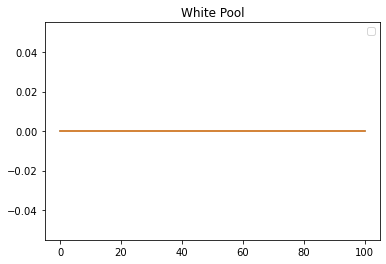

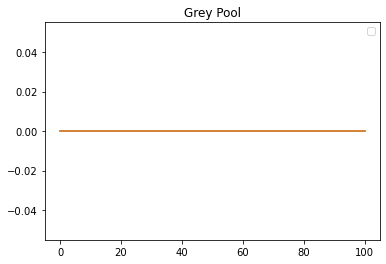

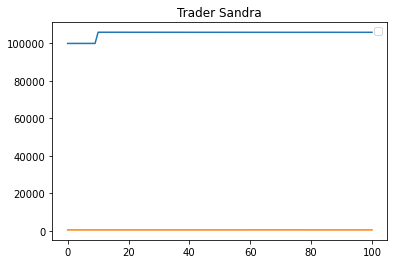

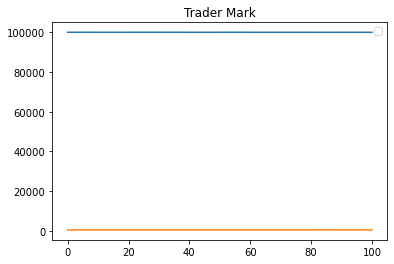

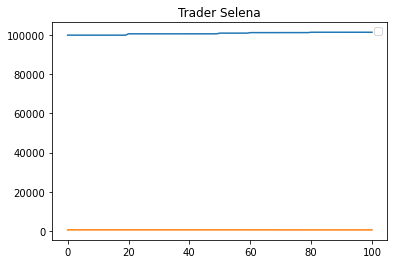

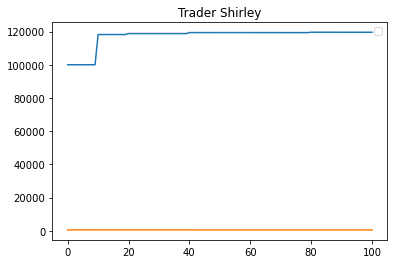

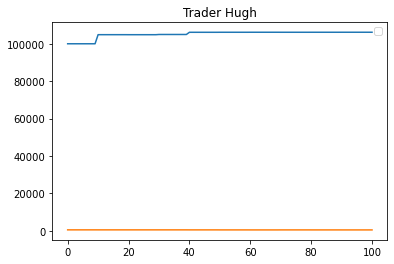

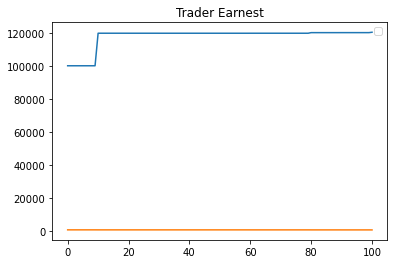

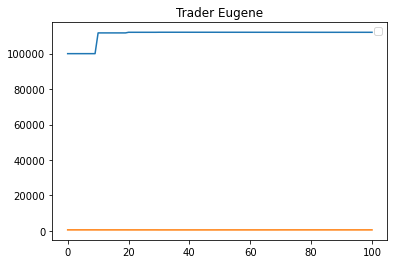

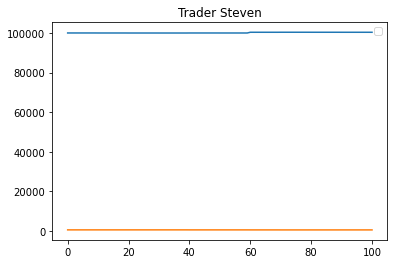

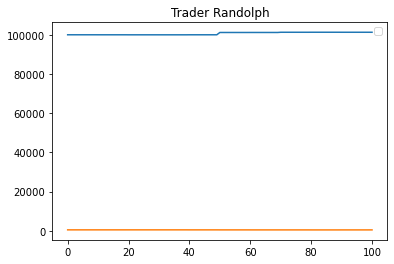

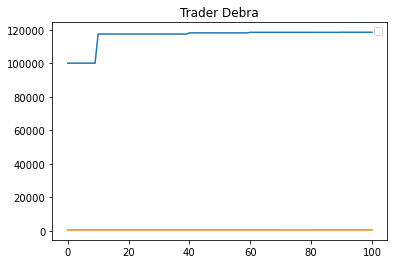

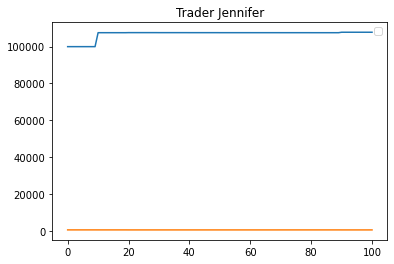

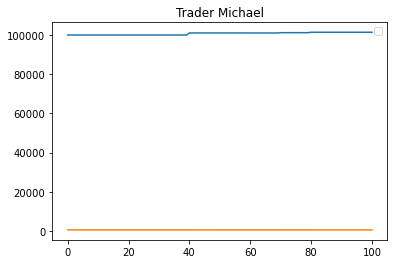

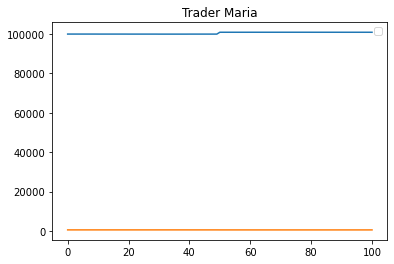

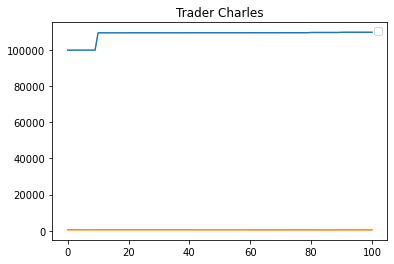

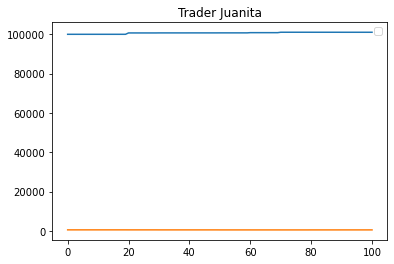

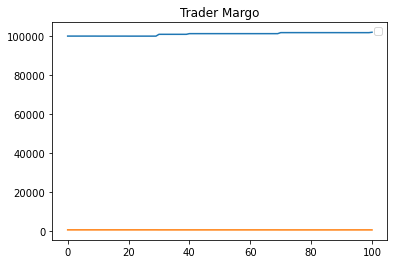

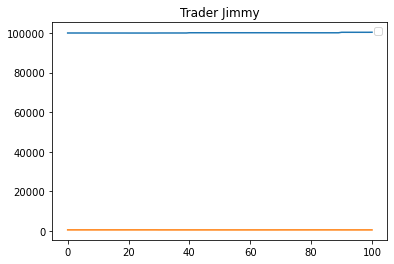

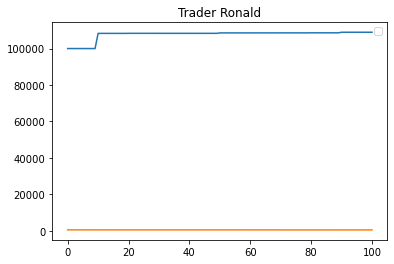

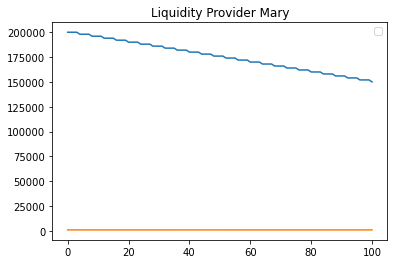

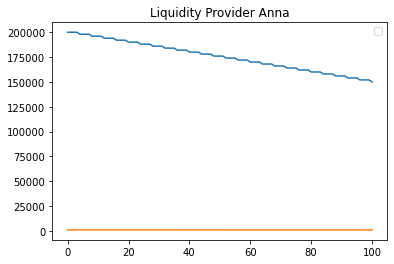

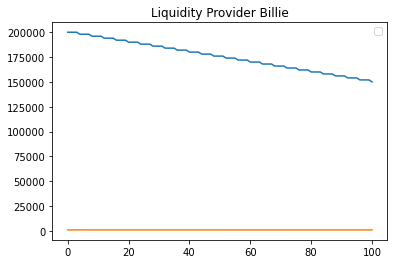

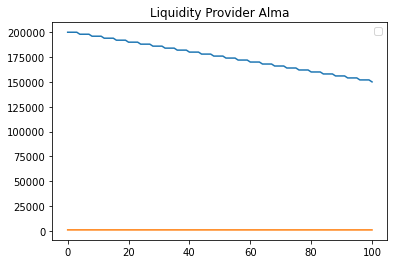

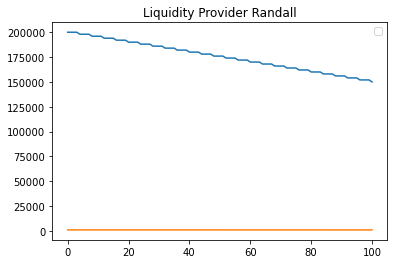

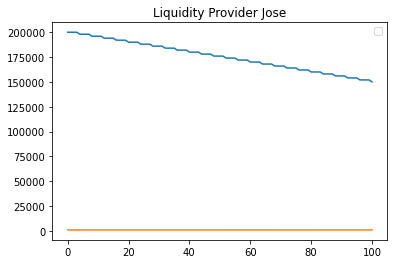

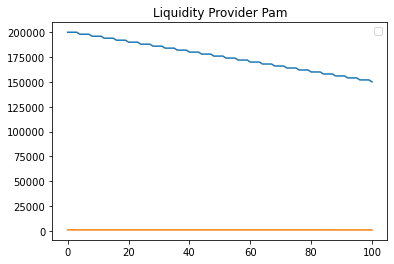

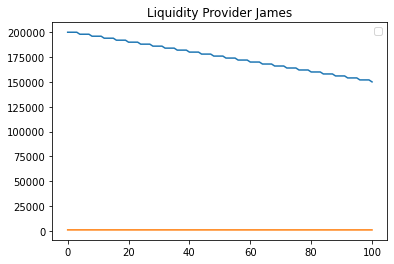

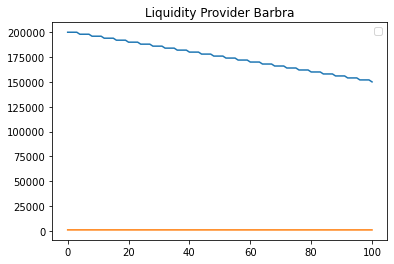

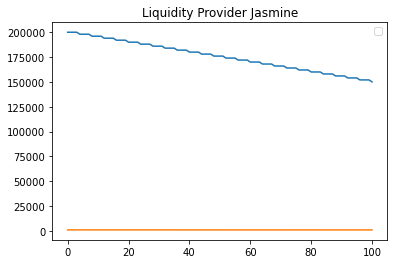

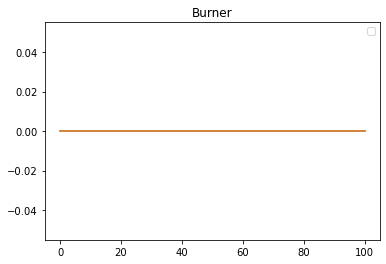

In [8]:
agents_df = df.agents
ldf = pd.concat([agents_df,df.timestep], axis=1)
pdf = ldf.agents.apply(pd.Series)

for column in pdf:
    fields = ['USD', 'ETH']
    df2 = pd.DataFrame([vars(f) for f in pdf[column]])
    df3 = pd.DataFrame([vars(f) for f in df2._wallet])
    df3.plot(title=column)

In [8]:
df_state = pd.DataFrame([vars(f) for f in df.state.to_numpy()])
df_state.tail()
# fields = ['val', 'other_field']
# pd.DataFrame([{fn: getattr(f, fn) for fn in fields} for f in allFoo])
# pd.DataFrame([vars(f) for f in df_state.tokenA.to_numpy()])

,ss,tick,tokenA,tokenB,white_pool_volume_USD,grey_pool_volume_USD,_total_Liq_minted_White,_total_Liq_minted_Grey,_total_Liq_supply_White,_total_Liq_supply_Grey,_total_Liq_burned_White,_total_Liq_burned_Grey,_next_free_marketplace_number,_marketplace_tick_previous_add,_percent_burn,_speculation_valuation,_percent_increase_speculation_valuation_per_s,kpis
96,"SimStrategy={growth_rate_if_0_sales=-0.118, in...",96,<model.parts.agents.web3engine.uniswappool.Tok...,<model.parts.agents.web3engine.uniswappool.Tok...,50080.88,58751.56,119.10,175.88,119.10,175.88,0.00,0.00,0,0,0.05,5000091.33,0.00,<model.Kpis.KPIs object at 0x7fc161039d60>
97,"SimStrategy={growth_rate_if_0_sales=-0.118, in...",97,<model.parts.agents.web3engine.uniswappool.Tok...,<model.parts.agents.web3engine.uniswappool.Tok...,50080.88,58751.56,119.10,175.88,119.10,175.88,0.00,0.00,0,0,0.05,5000092.28,0.00,<model.Kpis.KPIs object at 0x7fc161048d90>
98,"SimStrategy={growth_rate_if_0_sales=-0.118, in...",98,<model.parts.agents.web3engine.uniswappool.Tok...,<model.parts.agents.web3engine.uniswappool.Tok...,50080.88,58751.56,119.10,175.88,119.10,175.88,0.00,0.00,0,0,0.05,5000093.23,0.00,<model.Kpis.KPIs object at 0x7fc161055dc0>
99,"SimStrategy={growth_rate_if_0_sales=-0.118, in...",99,<model.parts.agents.web3engine.uniswappool.Tok...,<model.parts.agents.web3engine.uniswappool.Tok...,50080.88,58751.56,119.10,175.88,119.10,175.88,0.00,0.00,0,0,0.05,5000094.18,0.00,<model.Kpis.KPIs object at 0x7fc161063df0>
100,"SimStrategy={growth_rate_if_0_sales=-0.118, in...",100,<model.parts.agents.web3engine.uniswappool.Tok...,<model.parts.agents.web3engine.uniswappool.Tok...,52104.31,60761.56,119.59,176.06,119.59,176.06,0.00,0.00,0,0,0.05,5000095.13,0.00,<model.Kpis.KPIs object at 0x7fc16106eeb0>


In [9]:
df.tail()

,agents,state,simulation,subset,run,substep,timestep
96,"{'White Pool': PoolAgent={name=White Pool, _ab...",<model.SimState.SimState object at 0x7fc161039...,0,0,1,3,96
97,"{'White Pool': PoolAgent={name=White Pool, _ab...",<model.SimState.SimState object at 0x7fc161048...,0,0,1,3,97
98,"{'White Pool': PoolAgent={name=White Pool, _ab...",<model.SimState.SimState object at 0x7fc161055...,0,0,1,3,98
99,"{'White Pool': PoolAgent={name=White Pool, _ab...",<model.SimState.SimState object at 0x7fc161063...,0,0,1,3,99
100,"{'White Pool': PoolAgent={name=White Pool, _ab...",<model.SimState.SimState object at 0x7fc16106e...,0,0,1,3,100


# Uniswap Universe

## Global State variables for the Uniswap world
## i - Q instance
### Quantities of i-th risk asset, the Q asset and the i-asset shares

The following command lines **create three plots** that show: (for the i-th asset)
- on the left: the quantity of base asset `model_UNI_Qi` 
- center: the quantity of risk asset `model_UNI_Ri` 
- on the right: the quantity of shares `model_UNI_Si`
over all simulation steps

To show other assets the suffix of these commands can be replaced by f.e. `Qj` instead of `Qi`

### Prices of the i-th asset

The following command line creates a plot of the prices: (for the i-th asset)
- the swap price of the risk asset 
- the pool ratio price of the risk asset

Comparison of both plots shows the effects of fees.

For experiments where the price of the asset is affected - for example when it is traded - we expect this price either to rise or fall accordingly. For liquidity adds this price should remain unchanged.

To show other assets the suffix of these commands can be replaced by f.e. `Qj` instead of `Qi`

## j - Q instance
### Quantities of j-th risk asset, the Q asset and the j-asset shares


The following command lines create three plots that show: (for the j-th asset)
- on the left: the quantity of base asset `UNI_Qj` 
- center: the quantity of risk asset `UNI_Rj`
- on the right: the quantity of shares `UNI_Sj`

over the simulation steps

### Prices of the j-th asset

The following command line creates a plot of the prices: (for the j-th asset)
- the swap price of the risk asset 
- the pool ratio price of the risk asset

Comparison of both plots shows the effects of fees.

For experiments where the price of the asset is affected - for example when it is traded - we expect this price either to rise or fall accordingly. For liquidity adds this price should remain unchanged.